In [1]:
##Import libraries 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection 

In [2]:
sonar_dataset=pd.read_csv('sonar.all-data.csv')
sonar_dataset.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [3]:
sonar_dataset.shape

(207, 61)

In [4]:
sonar_dataset=pd.read_csv('sonar.all-data.csv',header=None)
sonar_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
sonar_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [6]:
sonar_dataset.groupby(60).size()

60
M    111
R     97
dtype: int64

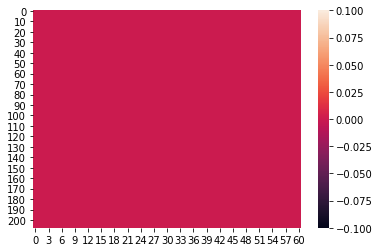

In [7]:
sns.heatmap(sonar_dataset.isnull())

In [8]:
sonar_dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


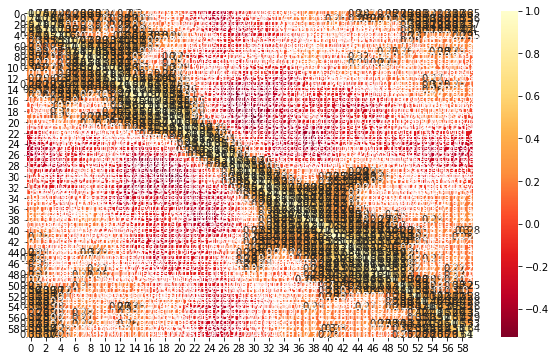

In [9]:
cor=sonar_dataset.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,cmap='YlOrRd_r',annot=True)
#highly correlated

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC9F2E9E08>,
      dtype=object)

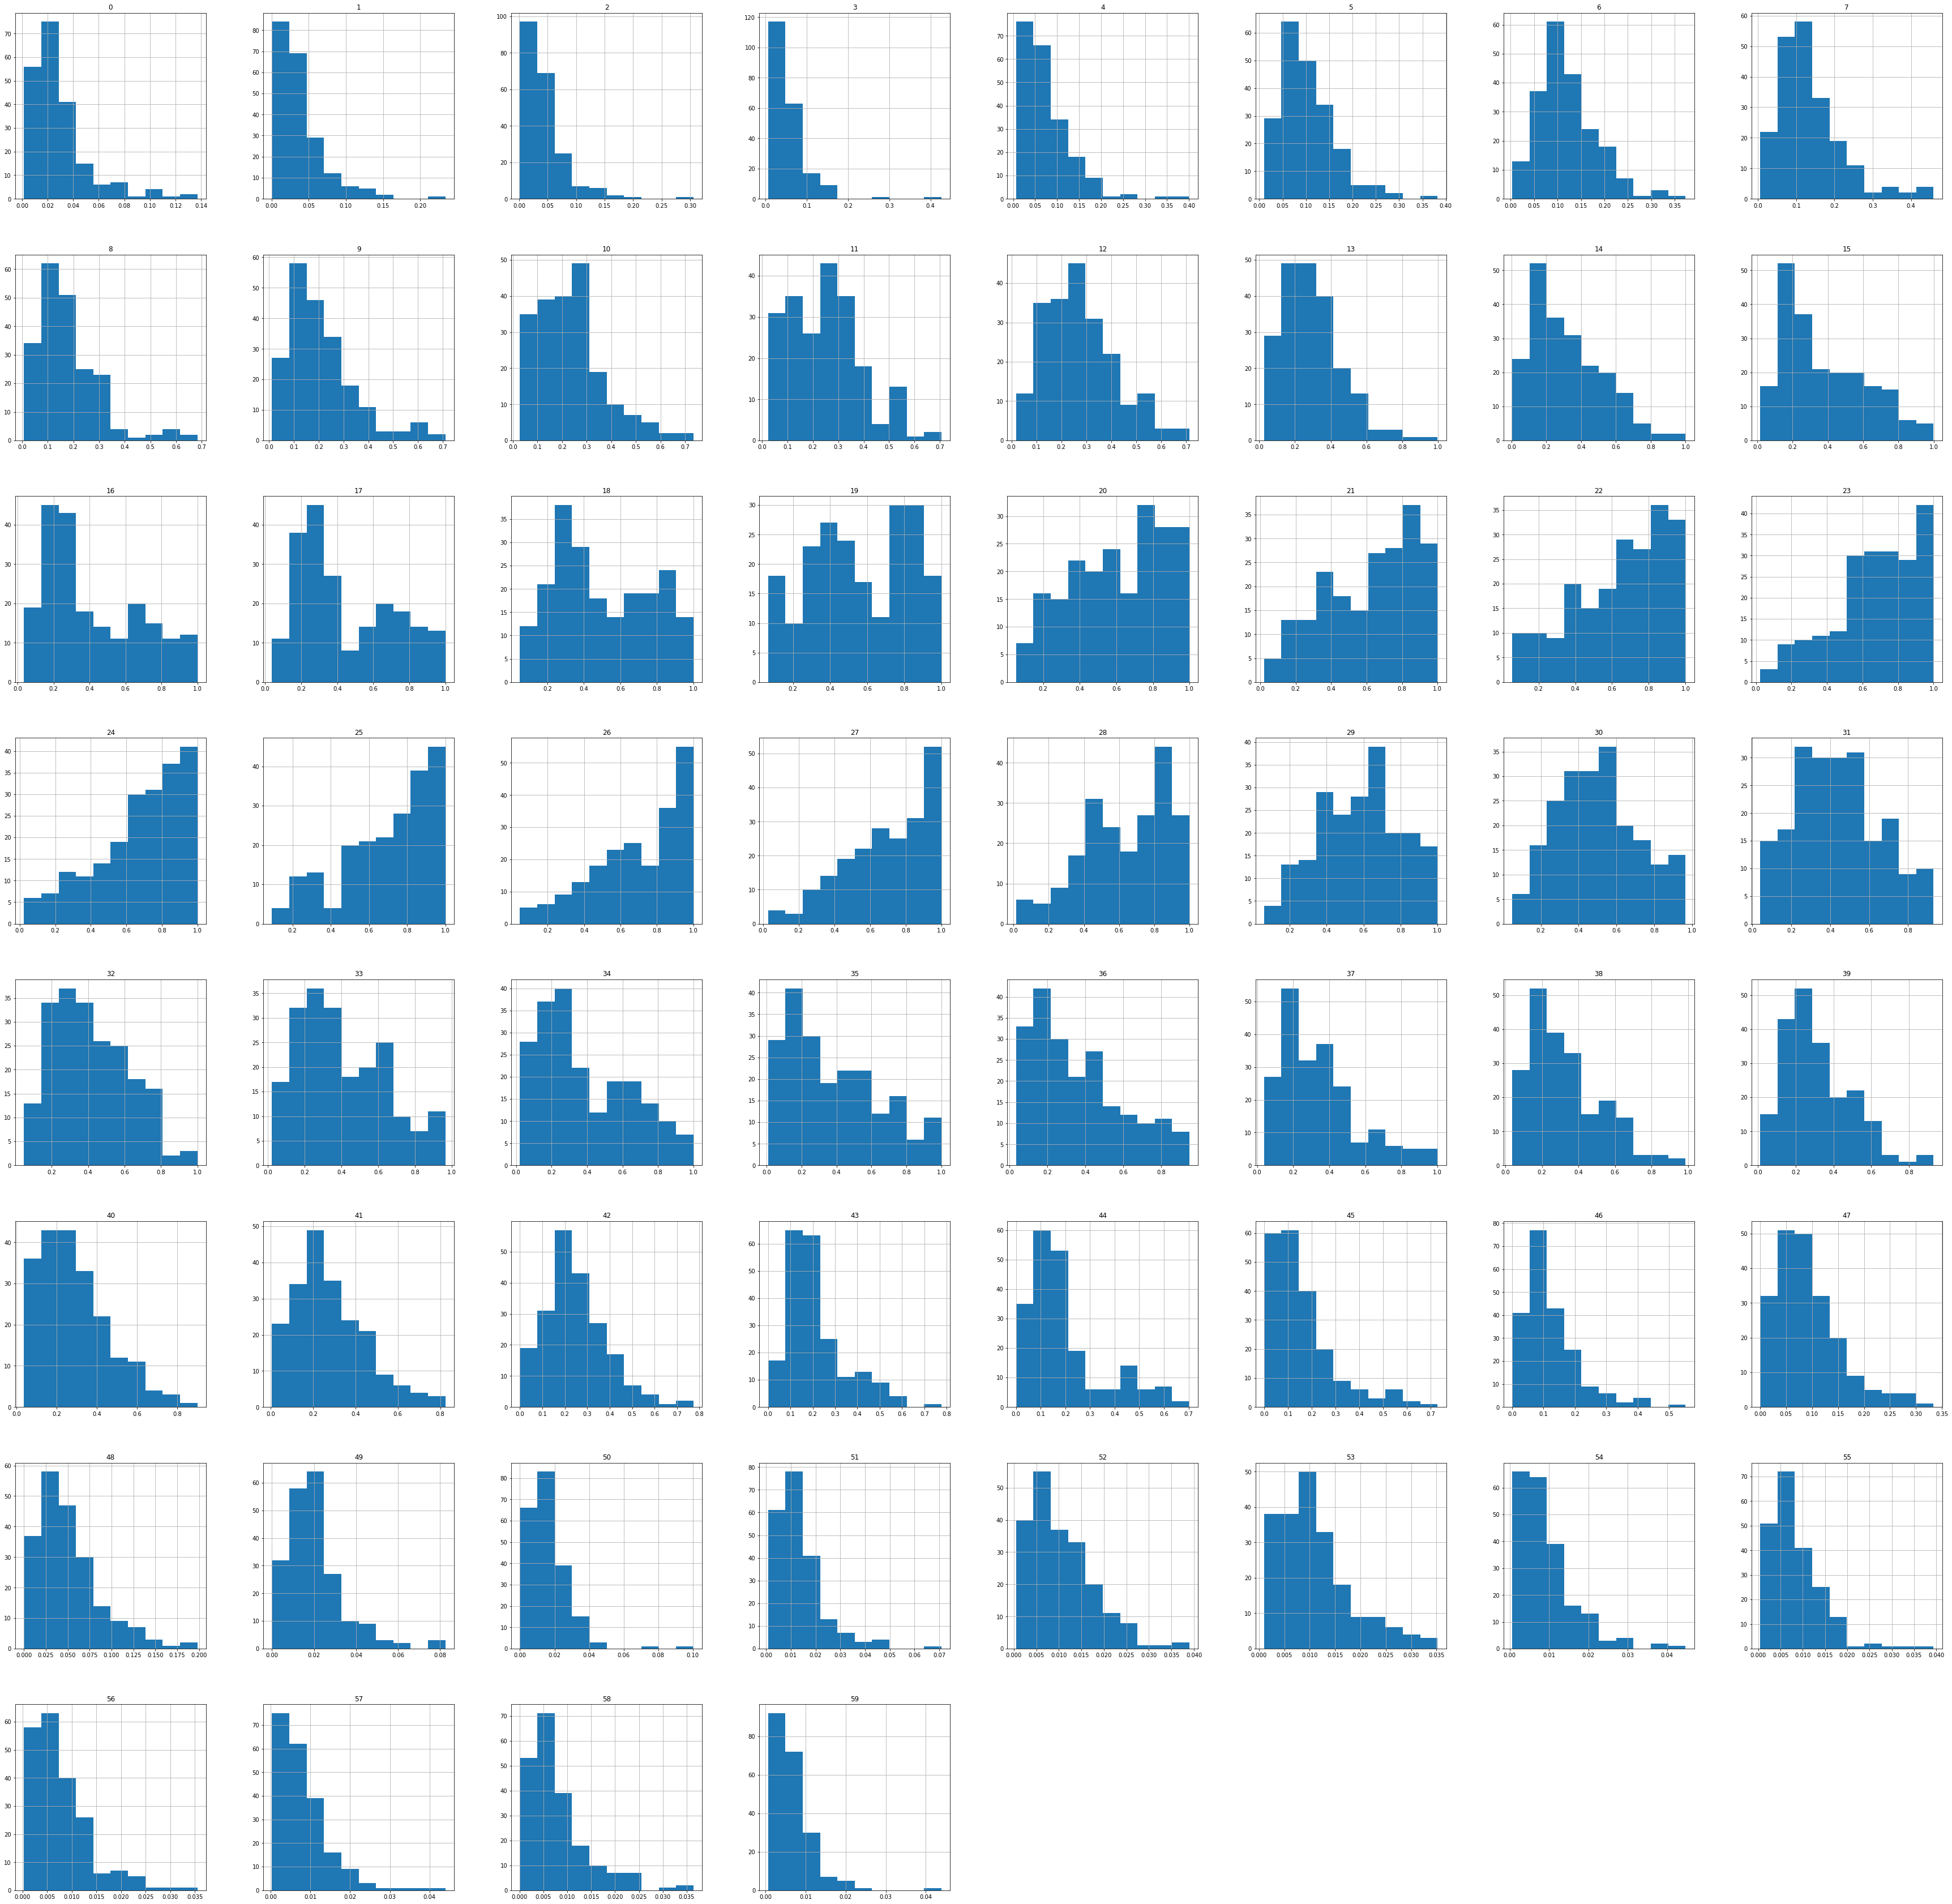

In [10]:
sonar_dataset.hist(figsize=(61,61))

In [11]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [12]:
X = sonar_dataset.iloc[:,0:-1]
Y = sonar_dataset.iloc[:,-1]

In [13]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [14]:
Y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [15]:
X.shape

(208, 60)

In [16]:
Y.shape

(208,)

In [17]:
# split out validation dataset for the end
from sklearn.model_selection import train_test_split

array = sonar_dataset.values
validation_size = 0.2
seed = 7
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [18]:
# test options
num_folds = 10
seed = 50
scoring = 'accuracy'

In [19]:
# check some algorithms
LR=LogisticRegression()
KNN=KNeighborsClassifier()
CART=DecisionTreeClassifier()
NB=GaussianNB()
SVM=SVC()
models = []
models.append(('LR', LR))
models.append(('KNN', KNN))
models.append(('CART', CART ))
models.append(('NB', NB))
models.append(('SVM', SVM))

In [20]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.769485 (0.100510)
KNN: 0.808088 (0.067507)
CART: 0.699632 (0.086143)
NB: 0.648897 (0.141868)
SVM: 0.776471 (0.090411)


In [21]:
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
results = []
names = []
score=[]
for name, model in models:
    model.fit(X_train,Y_train)
    pre=model.predict(X_test)
    AS=accuracy_score(Y_test,pre)
    print('***',name,'*** = ')
    print('Accuracy_score = ',AS)
    score.append(AS*100)

*** LR *** = 
Accuracy_score =  0.7380952380952381
*** KNN *** = 
Accuracy_score =  0.7380952380952381
*** CART *** = 
Accuracy_score =  0.7857142857142857
*** NB *** = 
Accuracy_score =  0.7142857142857143
*** SVM *** = 
Accuracy_score =  0.8095238095238095


In [22]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
# ensembles
AB=AdaBoostClassifier()
GBM= GradientBoostingClassifier()
RF=RandomForestClassifier()
ensembles = []
# Boosting methods
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
ensembles.append(('RF', RandomForestClassifier()))

In [23]:
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.813971 (0.066017)
GBM: 0.853676 (0.100318)
RF: 0.836397 (0.090074)


In [24]:
names = []
for name, model in ensembles:
    model.fit(X_train,Y_train)
    pre=model.predict(X_test)
    AS=accuracy_score(Y_test,pre)
    print('***',name,'*** = ')
    print('Accuracy_score = ',AS)
    score.append(AS*100)

*** AB *** = 
Accuracy_score =  0.7857142857142857
*** GBM *** = 
Accuracy_score =  0.9047619047619048
*** RF *** = 
Accuracy_score =  0.8571428571428571


SVM And GBM are the best options as per accuracy and csv score( considered the std deviation as well )

In [25]:
from sklearn.externals import joblib

#Save the model

joblib.dump(SVM,'sonar_svm_rfcfile.obj')
joblib.dump(GBM,'sonar_gbm_rfcfile.obj')

['sonar_gbm_rfcfile.obj']